In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import re
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer

In [ ]:
txt = """
Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
"""

In [13]:
txt2 = """The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, nine Minor Outlying Islands,[g] and 326 Indian reservations.
"""

In [12]:
print(txt.split())

['Natural', 'language', 'processing', '(NLP)', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics,', 'computer', 'science,', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language,', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data.', 'The', 'goal', 'is', 'a', 'computer', 'capable', 'of', '"understanding"', 'the', 'contents', 'of', 'documents,', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them.', 'The', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves.']


In [14]:
print(txt2.split())

['The', 'United', 'States', 'of', 'America', '(U.S.A.', 'or', 'USA),', 'commonly', 'known', 'as', 'the', 'United', 'States', '(U.S.', 'or', 'US)', 'or', 'America,', 'is', 'a', 'country', 'primarily', 'located', 'in', 'North', 'America.', 'It', 'consists', 'of', '50', 'states,', 'a', 'federal', 'district,', 'five', 'major', 'unincorporated', 'territories,', 'nine', 'Minor', 'Outlying', 'Islands,[g]', 'and', '326', 'Indian', 'reservations.']


In [9]:
data = pd.read_csv('train.tsv', sep='\t')

In [18]:
tbt = TreebankWordTokenizer()
wst = WhitespaceTokenizer()

In [19]:
print(tbt.tokenize(txt2))

['The', 'United', 'States', 'of', 'America', '(', 'U.S.A.', 'or', 'USA', ')', ',', 'commonly', 'known', 'as', 'the', 'United', 'States', '(', 'U.S.', 'or', 'US', ')', 'or', 'America', ',', 'is', 'a', 'country', 'primarily', 'located', 'in', 'North', 'America.', 'It', 'consists', 'of', '50', 'states', ',', 'a', 'federal', 'district', ',', 'five', 'major', 'unincorporated', 'territories', ',', 'nine', 'Minor', 'Outlying', 'Islands', ',', '[', 'g', ']', 'and', '326', 'Indian', 'reservations', '.']


In [20]:
print(wst.tokenize(txt2))

['The', 'United', 'States', 'of', 'America', '(U.S.A.', 'or', 'USA),', 'commonly', 'known', 'as', 'the', 'United', 'States', '(U.S.', 'or', 'US)', 'or', 'America,', 'is', 'a', 'country', 'primarily', 'located', 'in', 'North', 'America.', 'It', 'consists', 'of', '50', 'states,', 'a', 'federal', 'district,', 'five', 'major', 'unincorporated', 'territories,', 'nine', 'Minor', 'Outlying', 'Islands,[g]', 'and', '326', 'Indian', 'reservations.']


In [26]:
data["Sentiment"].unique()

array([1, 2, 3, 4, 0], dtype=int64)

### Sentiment Label Meaning

 - 0: Highly Negative
 - 1: Negative
 - 2: Neutral
 - 3: Positive
 - 4: Highly Positive


In [27]:
data["Sentiment"].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [28]:
data["Sentiment"].value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

Text(0.5, 1.0, '% of reviews by sentiment score')

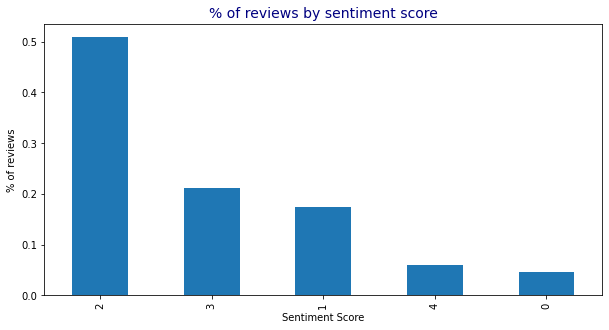

In [30]:
data["Sentiment"].value_counts(normalize=True).plot(kind='bar', figsize=(10,5))
plt.xlabel('Sentiment Score')
plt.ylabel('% of reviews')
plt.title('% of reviews by sentiment score', fontsize=14, color='navy')

In [40]:
# Find number of token in each phrase
def token_counter(txt):
    # String is empty or null
    # txt is not string
    if isinstance(txt,str):
        tokens = tbt.tokenize(txt)
        return len(tokens)
    return 0

In [48]:
# Create new dataframe that has more than 3 tokens in a phrase

relevant_data = data[data["token_counter"]>3]

In [49]:
data["token_counter"] = data["Phrase"].map(token_counter)

In [50]:
data

,PhraseId,SentenceId,Phrase,Sentiment,token_counter
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1
...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,2
156056,156057,8544,forced avuncular chortles,1,3
156057,156058,8544,avuncular chortles,3,2
156058,156059,8544,avuncular,2,1


Text(0.5, 1.0, '% of reviews by sentiment score')

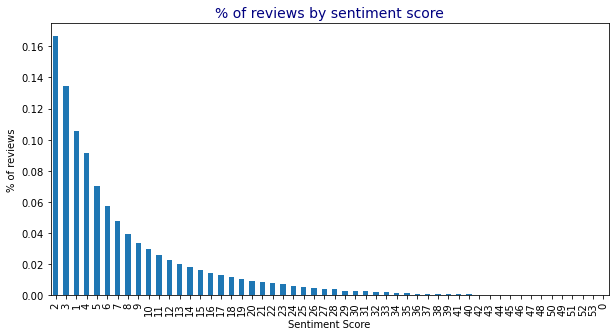

In [43]:
data["token_counter"].value_counts(normalize=True).plot(kind='bar', figsize=(10,5))
plt.xlabel('Sentiment Score')
plt.ylabel('% of reviews')
plt.title('% of reviews by sentiment score', fontsize=14, color='navy')

In [63]:
phrase_count = pd.DataFrame(data["Phrase"].value_counts()).reset_index()
phrase_count.columns = ["Phrase", "Count"]
# phrase_count = phrase_count[phrase_count["Count"]>1]
phrase_count

,Phrase,Count
0,A series of escapades demonstrating the adage ...,1
1,exist without the precedent of Yiddish theater...,1
2,American musical comedy as we,1
3,American musical comedy,1
4,as we,1
...,...,...
156055,'s kind,1
156056,"of insulting , both to men and women",1
156057,of insulting,1
156058,", both to men and women",1


In [65]:
len([i for i in data["Phrase"].values if "series" in i])

374

In [66]:
data["Phrase"][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [69]:
tf = 1
df = len([i for i in data["Phrase"].values if "series" in i])
nd = data.shape[0]
tf * (np.log10(nd/df))

2.620420000379036

In [70]:
# Define pre processing steps

def preprocess_review(review):
    """
    Pre processes reviews
    """
    
    # 1. Tokenize text using NLTK TreeBank Tokenizer (Output will be a list)
    # 2. Every token that is not alpha/numeic/alpha-numeric, replace it with empty string
    # 3. Convert all tokens to lower case
    # 4. Join the precessed tokens with a " "
    
    return ' '.join([t.lower().strip() for t in tbt.tokenize(re.sub('[^a-z0-9\s]', '', review, flags=re.I|re.M))])


In [72]:
preprocess_review(data.iloc[0]["Phrase"])

'a series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story'

In [74]:
relevant_data['review'] = data['Phrase'].map(preprocess_review)

C:\Users\Manish_Bhoge\AppData\Local\Temp\ipykernel_25196\1123486741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['review'] = data['Phrase'].map(preprocess_review)


In [76]:
relevant_data.head()

,PhraseId,SentenceId,Phrase,Sentiment,token_counter,review
0,1,1,A series of escapades demonstrating the adage ...,1,37,a series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2,14,a series of escapades demonstrating the adage ...
5,6,1,of escapades demonstrating the adage that what...,2,12,of escapades demonstrating the adage that what...
7,8,1,escapades demonstrating the adage that what is...,2,11,escapades demonstrating the adage that what is...
9,10,1,demonstrating the adage that what is good for ...,2,10,demonstrating the adage that what is good for ...


In [95]:
X = relevant_data['review']
y = relevant_data['Sentiment']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

In [97]:
cvect = CountVectorizer()

In [98]:
X_train_vect = cvect.fit_transform(X_train)

# Run the same vector on Randomforest Classifier

In [99]:
rf = RandomForestClassifier()

In [100]:
rf.fit(X_train_vect, y_train)

RandomForestClassifier()

In [101]:
y_pred = rf.predict(cvect.transform(X_test))

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.37      0.41      1792
           1       0.55      0.47      0.51      5910
           2       0.61      0.74      0.67     11083
           3       0.56      0.52      0.54      6730
           4       0.52      0.39      0.45      2259

    accuracy                           0.57     27774
   macro avg       0.54      0.50      0.51     27774
weighted avg       0.57      0.57      0.57     27774



# Run the same vector on Logistics Regression

In [105]:
logr = LogisticRegression()

In [106]:
rf.fit(X_train_vect, y_train)

RandomForestClassifier()

In [107]:
y_pred = rf.predict(cvect.transform(X_test))

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.37      0.41      1792
           1       0.55      0.47      0.51      5910
           2       0.61      0.73      0.66     11083
           3       0.56      0.52      0.54      6730
           4       0.53      0.39      0.45      2259

    accuracy                           0.57     27774
   macro avg       0.54      0.50      0.51     27774
weighted avg       0.57      0.57      0.57     27774

